# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

You have one day to perform this analysis

## 🕶 Importations

📌 Modules pip install

In [49]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ca9f61db5d5b27f9cfd7fee86cb1cf246b737d04d669a7d260140f3cbc54116a
  Stored in directory: c:\users\zaome\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [165]:
!pip install plotly --upgrade

📌 Import librairies 

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import mglearn

📌 Import Dataset

In [248]:
mall_df = pd.read_csv('C:/Users/zaome/Documents/Projet_analyse_clients/Projet_centre_commercial/Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 🕶 Exploration du Dataset

📌 Data shape

In [249]:
mall_df.shape

(200, 5)

📌 Information sur le Dataset

In [250]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


📌 Description des statistiques

In [251]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


📌 Type

In [252]:
mall_dtype = mall_df.dtypes
mall_dtype.value_counts()

int64     4
object    1
dtype: int64

📌 Missing value

In [253]:
mall_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

📌 Valeur nulle

In [254]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

📌 Outliers

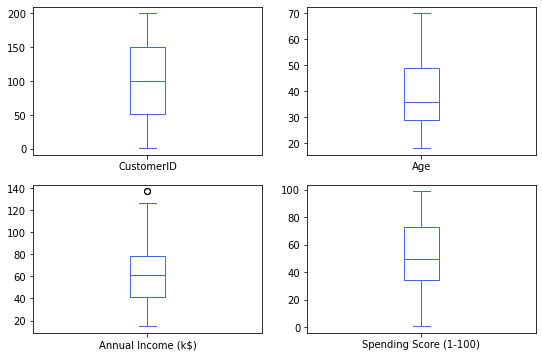

In [265]:
mall_df.plot(kind='box', subplots=True, layout=(2, 2), figsize = (9, 6), color='royalblue')
plt.show()

## 🕶 Visualisations

📌 Correlation

<AxesSubplot:>

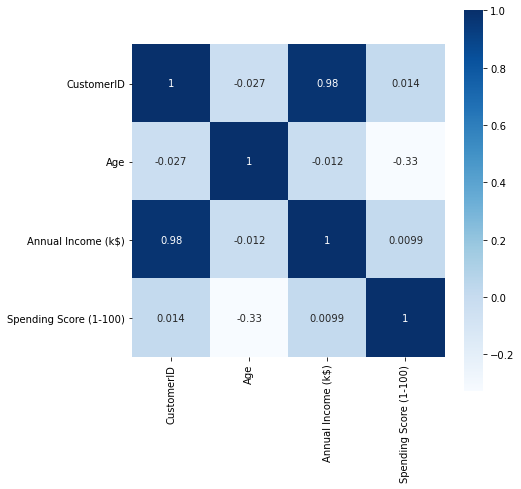

In [256]:
corr = mall_df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,cbar=True, square=True, annot=True, cmap='Blues')

💡 Nous pouvons voir qu'il n'y a pratiquement aucune corrélation entre les variables. Il y a juste une légère relation inverse entre l'Age et le Spending Score, mais elle n'est pas assez efficace pour que nous en tenions compte.

💡 L'Annual Income et le Spending Score ont une corrélation positive, comme cela n'est pas pertinent, nous pouvons supposer que la plupart des personnes peuvent maintenir leur score élevé indépendamment du montant de leur revenu.

! Ils peuvent compter sur leur carte de crédit pour continuer à dépenser !


📌 Barplots

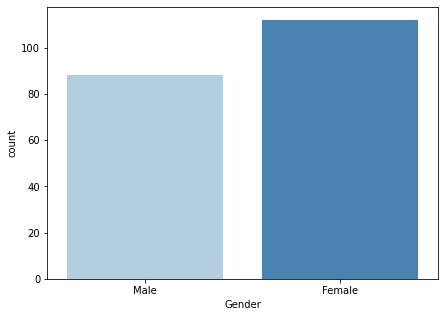

In [262]:
plt.figure(figsize = (7,5))
sns.countplot(x = "Gender", data = mall_df, palette="Blues")

💡 D'après les données, les femmes ont tendance à faire plus d'achats que les hommes.

📌 Histogramme 

<AxesSubplot:xlabel='Age', ylabel='count'>

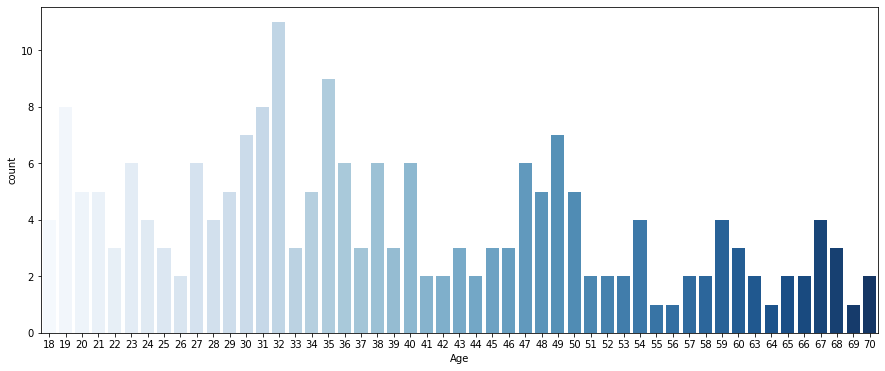

In [270]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Age", data = mall_df, palette="Blues")

💡 Cette visualisation nous indique que les gens ont tendance à faire plus d'achats dans la trentaine.

## 🕶 Agglomerative clustering 

📝 Le clustering hiérarchique agglomératif est une suite d'algorithmes de clustering qui reposent sur les mêmes principes (bottom-up) : les algorithmes déclarent d'abord tous les points de données comme des clusters qui leur sont propres, puis les deux clusters les plus similaires fusionnent ensemble et ainsi de suite jusqu'à ce qu'un critère d'arrêt soit atteint. Pour scikit-learn, le critère d'arrêt est le nombre de clusters (n_clusters). L'algorithme prend également un paramètre "linkage" qui nous indique "comment identifier les deux clusters les plus similaires". Il existe quatre types de liens mis en œuvre par scikit-learn : 

* Ward : minimise la variance des clusters fusionnés.
* Average : utilise la distance moyenne de chaque observation des deux ensembles.
* Complete/Maximum : utilise la distance maximale entre toutes les observations des deux ensembles
* Single : utilise la distance minimale entre toutes les observations des deux ensembles Ward fonctionne sur la plupart des ensembles de données et c'est l'option par défaut de scikit-learn, si les clusters ont un nombre de membres très dissemblables (si l'un est beaucoup plus grand que tous les autres), average ou complete pourrait mieux fonctionner.

In [71]:
from sklearn.cluster import AgglomerativeClustering 

📌 Agglomerative clustering avec 3 clusters

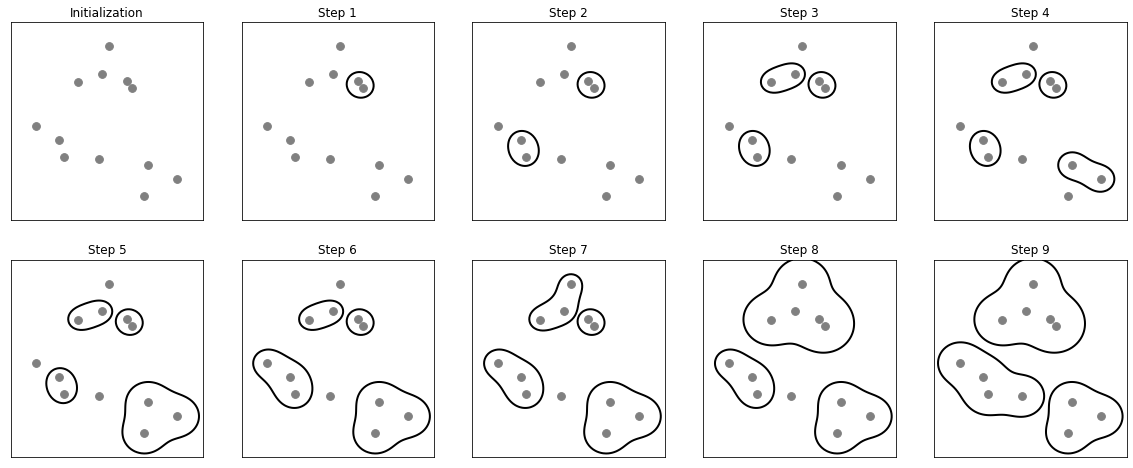

In [123]:
mglearn.plots.plot_agglomerative_algorithm()

💡 Tout d'abord, tous les points sont initialisés en tant que clusters individuels. Ensuite, à chaque étape, les deux clusters les plus proches sont fusionnés. 

Dans les quatre premières étapes, 4 ensembles de clusters de deux points sont formés. Dans les étapes 5 à 7, trois clusters de 3 points sont formés et finalement dans l'étape 9, 3 clusters principaux sont formés de points différents.

📌 Agglomerative clustering avec 5 clusters

In [221]:
X = mall_df[['Annual Income (k$)','Spending Score (1-100)']].values
Y = mall_df[['Age','Spending Score (1-100)']].values

In [127]:
agglo = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ch = agglo.fit_predict(X)

📌 Drop colonne 

In [131]:
mall_df = pd.get_dummies(mall_df,columns=['Gender'], prefix = ['sex'])

In [132]:
df = mall_df.drop('CustomerID',axis=1)

📌 Nouvelle feature "cluster"

In [133]:
agg_pred = agglo.fit_predict(df)

In [136]:
df['cluster'] = agg_pred
df

,Age,Annual Income (k$),Spending Score (1-100),sex_Female,sex_Male,cluster
0,19,15,39,0,1,4
1,21,15,81,0,1,3
2,20,16,6,1,0,4
3,23,16,77,1,0,3
4,31,17,40,1,0,4
...,...,...,...,...,...,...
195,35,120,79,1,0,2
196,45,126,28,1,0,1
197,32,126,74,0,1,2
198,32,137,18,0,1,1


📌 Boxplots Annual Income

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

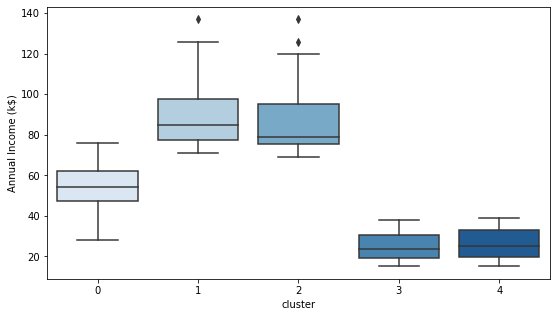

In [238]:
plt.figure(figsize=(9,5))
sns.boxplot(x='cluster',y='Annual Income (k$)', data=df, palette='Blues')

📌 Boxplots Spending Score

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

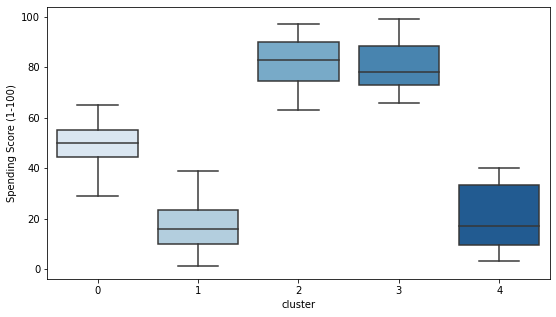

In [240]:
plt.figure(figsize=(9,5))
sns.boxplot(x='cluster',y='Spending Score (1-100)', data=df, palette='Blues')

📌 Boxplots Age

<AxesSubplot:xlabel='cluster', ylabel='Age'>

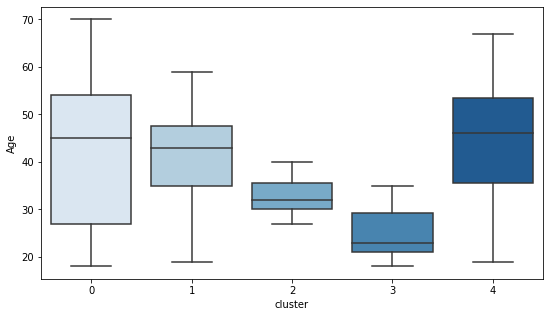

In [237]:
plt.figure(figsize=(9,5))
sns.boxplot(x='cluster',y='Age', data=df, palette='Blues')

📌 Pairplot

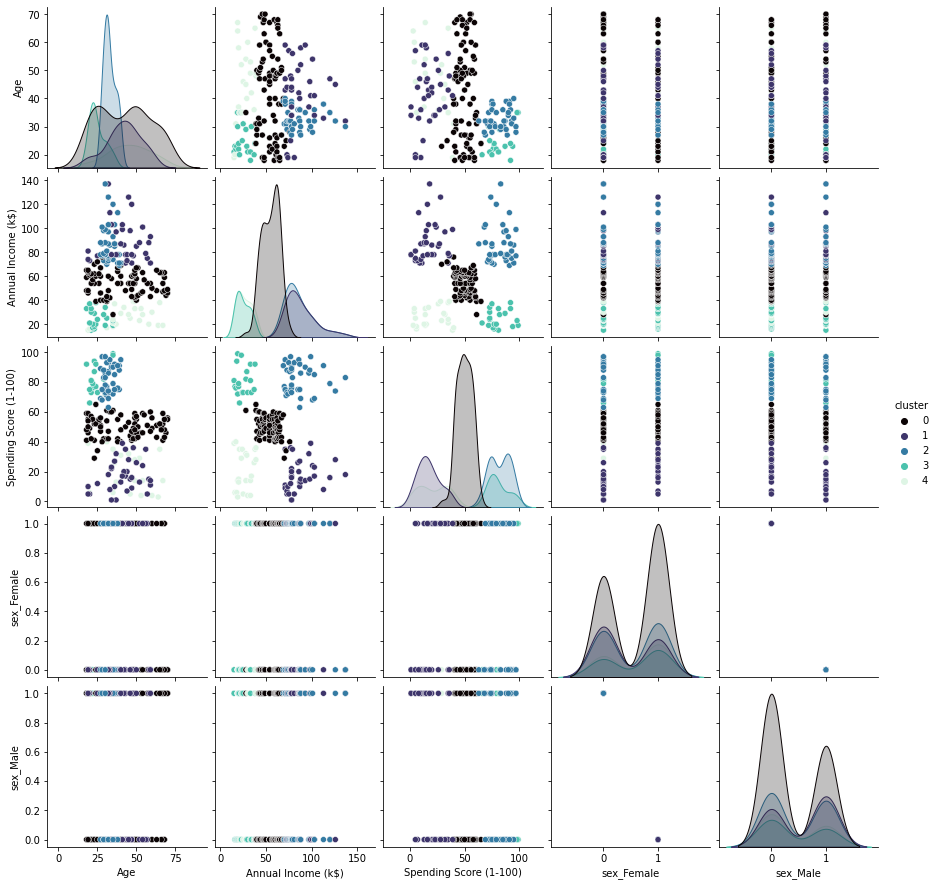

In [157]:
sns.pairplot(df,hue='cluster', palette="mako")

📌 Affichage des 5 clusters avec Age

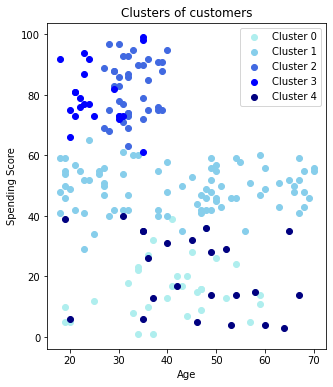

In [224]:
plt.figure(figsize=(5,6))

plt.scatter(Y[y_hc == 0, 0], Y[y_hc == 0, 1], c = 'paleturquoise', label = 'Cluster 0')
plt.scatter(Y[y_hc == 1, 0], Y[y_hc == 1, 1], c = 'skyblue', label = 'Cluster 1')
plt.scatter(Y[y_hc == 2, 0], Y[y_hc == 2, 1], c = 'royalblue', label = 'Cluster 2')
plt.scatter(Y[y_hc == 3, 0], Y[y_hc == 3, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(Y[y_hc == 4, 0], Y[y_hc == 4, 1], c = 'navy', label = 'Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

💡 Il n'y a pas de groupes distincts pour l'"Age" par rapport au "Spending Score".

📌 Affichage des 5 clusters avec Income

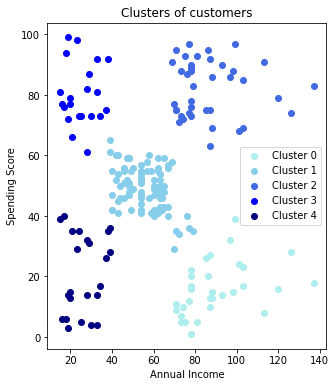

In [229]:
plt.figure(figsize=(5,6))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], c = 'paleturquoise', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], c = 'skyblue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], c = 'royalblue', label = 'Cluster 2')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], c = 'navy', label = 'Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

💡 5 clusters permettent de mieux différencier chacun des sous-groupes. Les cinq groupes sont les suivants :

* Faible revenu avec un score de dépenses élevé (Cluster 0)
* Faible revenu avec un faible score de dépenses (Cluster 1)
* Revenu élevé avec un score de dépenses élevé (Cluster 2)
* Revenu moyen avec un score de dépenses moyen (Cluster 3)
* Revenu élevé avec un score de dépenses faible (Cluster 4)

💡 Nous pouvons voir que les clusters sont identiques à ceux qui utilisent la liaison "complète". Cela pourrait indiquer que les clusters sont bien définis puisque le changement de lien n'affecte pas les clusters. Ce graphique utilise le couplage 'ward' et 5 clusters.

📌 Import librairies

In [209]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram, linkage

📌 Dendogramme

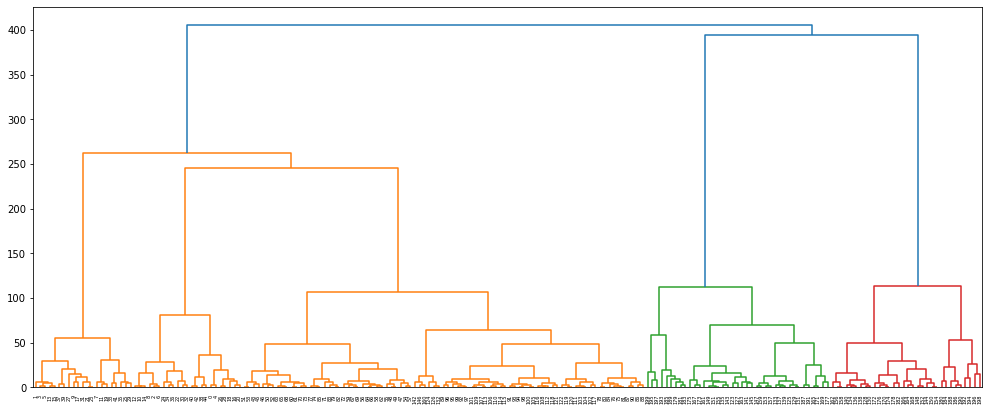

In [212]:
plt.figure(figsize = (17, 7))
dendo = dendrogram(linkage(X, method = 'ward'))
plt.show()

📌 Dendrogramme interactif

In [201]:
# Affichage
fig.update_layout(width = 1000, height = 500, yaxis_title = 'Distance entre les clusters', xaxis_title = 'Sample index')
fig.update_xaxes(showticklabels=False)

# Ligne pointillée
fig.add_shape(
        type='line',
        x0=0,
        y0=260,
        x1=1985,
        y1=260,
        line=dict(
            color='Black',
            dash='dash'
        )
)
fig.show()

💡 L'axe vertical (distance entre les clusters) représente la distance euclidienne. En partant du bas, les feuilles fusionnent en branches et cela correspond aux échantillons/clusters qui sont similaires les uns aux autres. La distance verticale représente la similarité des clusters. Par exemple, plus les distances verticales sont grandes avant la fusion, plus les clusters sont dissemblables. 

💡 La ligne pointillée montre où nous choisissons de couper le dendrogramme pour obtenir un nombre désiré de clusters. Le nombre de lignes verticales avant de se diviser sous les lignes pointillées nous indique le nombre de clusters que nous aurons si nous coupons à la distance verticale (distance entre les clusters). Dans ce dendrogramme, nous pouvons voir qu'il y a cinq clusters lorsque nous coupons à la distance des clusters = 260, et qu'il y a 5 lignes verticales sous les lignes pointillées avant de se diviser.

💡 Ainsi, à l'aide de ce dendrogramme, nous pouvons examiner chaque clusters individuelle et la façon dont il fusionne pour former un cluster plus grande de bas en haut. Cela nous fournit beaucoup d'informations puisque nous pouvons inspecter chaque échantillon individuel et examiner dans quelle mesure il est similaire (ou non) aux échantillons avec lesquels il fusionne. 

# Conclusions

🔎 Projet centre commercial : Le client de ce projet est le propriétaire d'un centre commpercial et il souhaite savoir les typologies de clients qui achètent.